<a href="https://colab.research.google.com/github/BakhtiyDeveloper/Class_Covid_19/blob/main/Proyekt_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import fastai

In [5]:
from sys import exit
from textwrap import dedent
from fastai.vision.all import *
from ipywidgets import widgets

In [3]:
!pip install fastai==2.5.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.5/189.5 KB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.9/881.9 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 72.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 81.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 85.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 86.4 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1+cu116
    Uninstalling torch-1.13.1+cu116:
      Successfully uninstalled torch-1.13.1+cu116
  At

In [2]:
print(torch.__version__)
print(fastai.__version__)

1.10.2+cu102
2.5.3


In [6]:
!unzip /content/drive/MyDrive/chest_xray.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0448-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0449-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0450-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0451-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0452-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0453-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0453-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0455-0001.jpeg  
  inflatin

In [8]:
path = Path("/content/chest_xray/train")
path.ls()

(#3) [Path('/content/chest_xray/train/.DS_Store'),Path('/content/chest_xray/train/NORMAL'),Path('/content/chest_xray/train/PNEUMONIA')]

In [9]:
get_img = get_image_files(path)
get_img

(#5216) [Path('/content/chest_xray/train/NORMAL/NORMAL2-IM-0555-0001-0001.jpeg'),Path('/content/chest_xray/train/NORMAL/IM-0523-0001-0001.jpeg'),Path('/content/chest_xray/train/NORMAL/IM-0475-0001.jpeg'),Path('/content/chest_xray/train/NORMAL/IM-0591-0001.jpeg'),Path('/content/chest_xray/train/NORMAL/NORMAL2-IM-0609-0001.jpeg'),Path('/content/chest_xray/train/NORMAL/IM-0248-0001.jpeg'),Path('/content/chest_xray/train/NORMAL/IM-0303-0001.jpeg'),Path('/content/chest_xray/train/NORMAL/NORMAL2-IM-0804-0001.jpeg'),Path('/content/chest_xray/train/NORMAL/IM-0523-0001-0002.jpeg'),Path('/content/chest_xray/train/NORMAL/NORMAL2-IM-0877-0001.jpeg')...]

In [10]:
fail_img = verify_images(path)
fail_img

'PosixPath' object is not iterable


(#0) []

In [11]:
Covid_class = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms = Resize(224)  
)


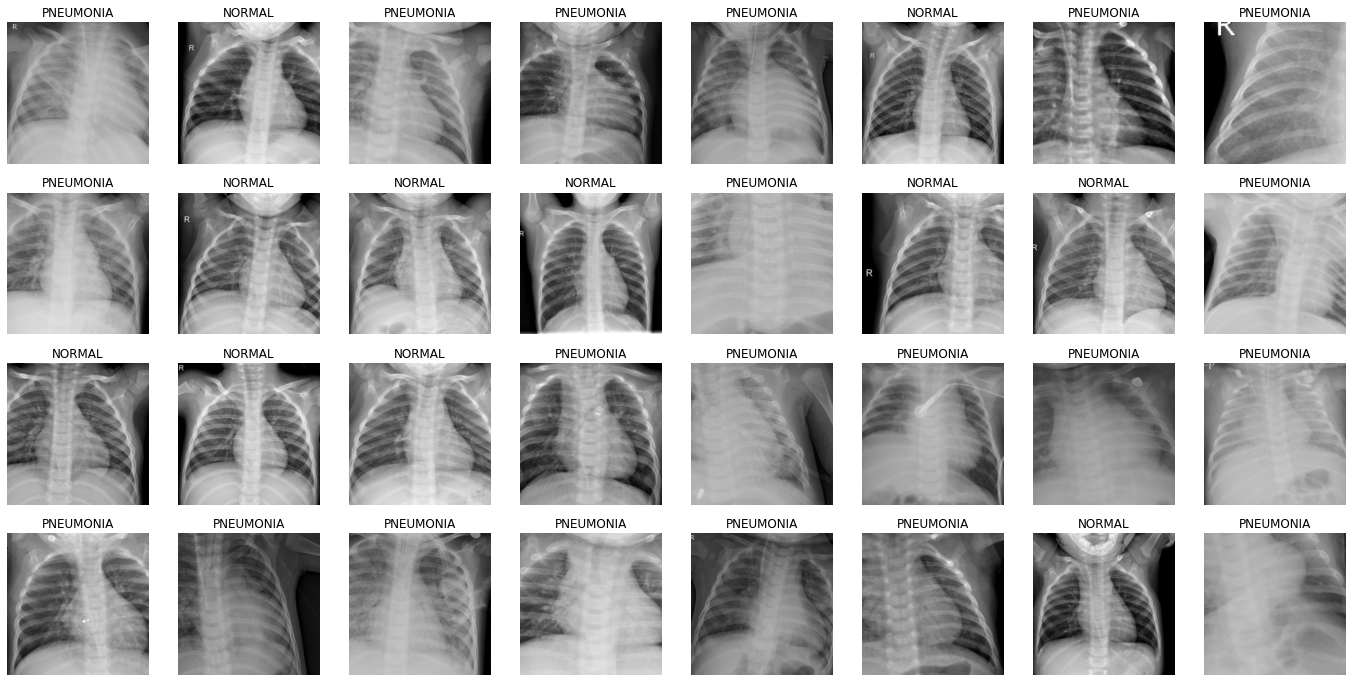

In [12]:

# Dataloaders 

dls = Covid_class.dataloaders(path)

#datasetni tekshiramiz

dls.train.show_batch(max_n=32, nrows=4)

In [27]:
from torchvision.models.efficientnet import efficientnet_b1
learn = cnn_learner(dls, resnet50, resnet34, metrics=accuracy)
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.419050,0.277340,0.938639,01:53


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f78a0ba24c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f78a0ba24c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

epoch,train_loss,valid_loss,accuracy,time
0,0.153186,0.127187,0.970278,01:52
1,0.099409,0.079404,0.976989,01:54
2,0.049419,0.078352,0.976031,01:52
3,0.028378,0.067035,0.980825,01:53


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f78a0ba24c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.8/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f78a0ba24c0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1328, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py", line 1320, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/pytho

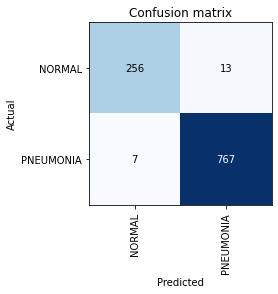

In [28]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

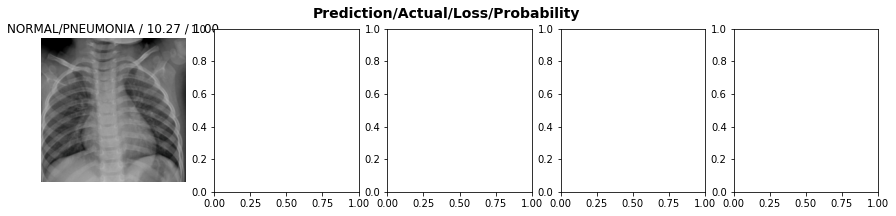

In [29]:
interp.plot_top_losses(5, nrows=1)

In [30]:
upload = widgets.FileUpload()
upload 

FileUpload(value={}, description='Upload')

Bashorat: PNEUMONIA 
Ehtomolligi: 99.8%


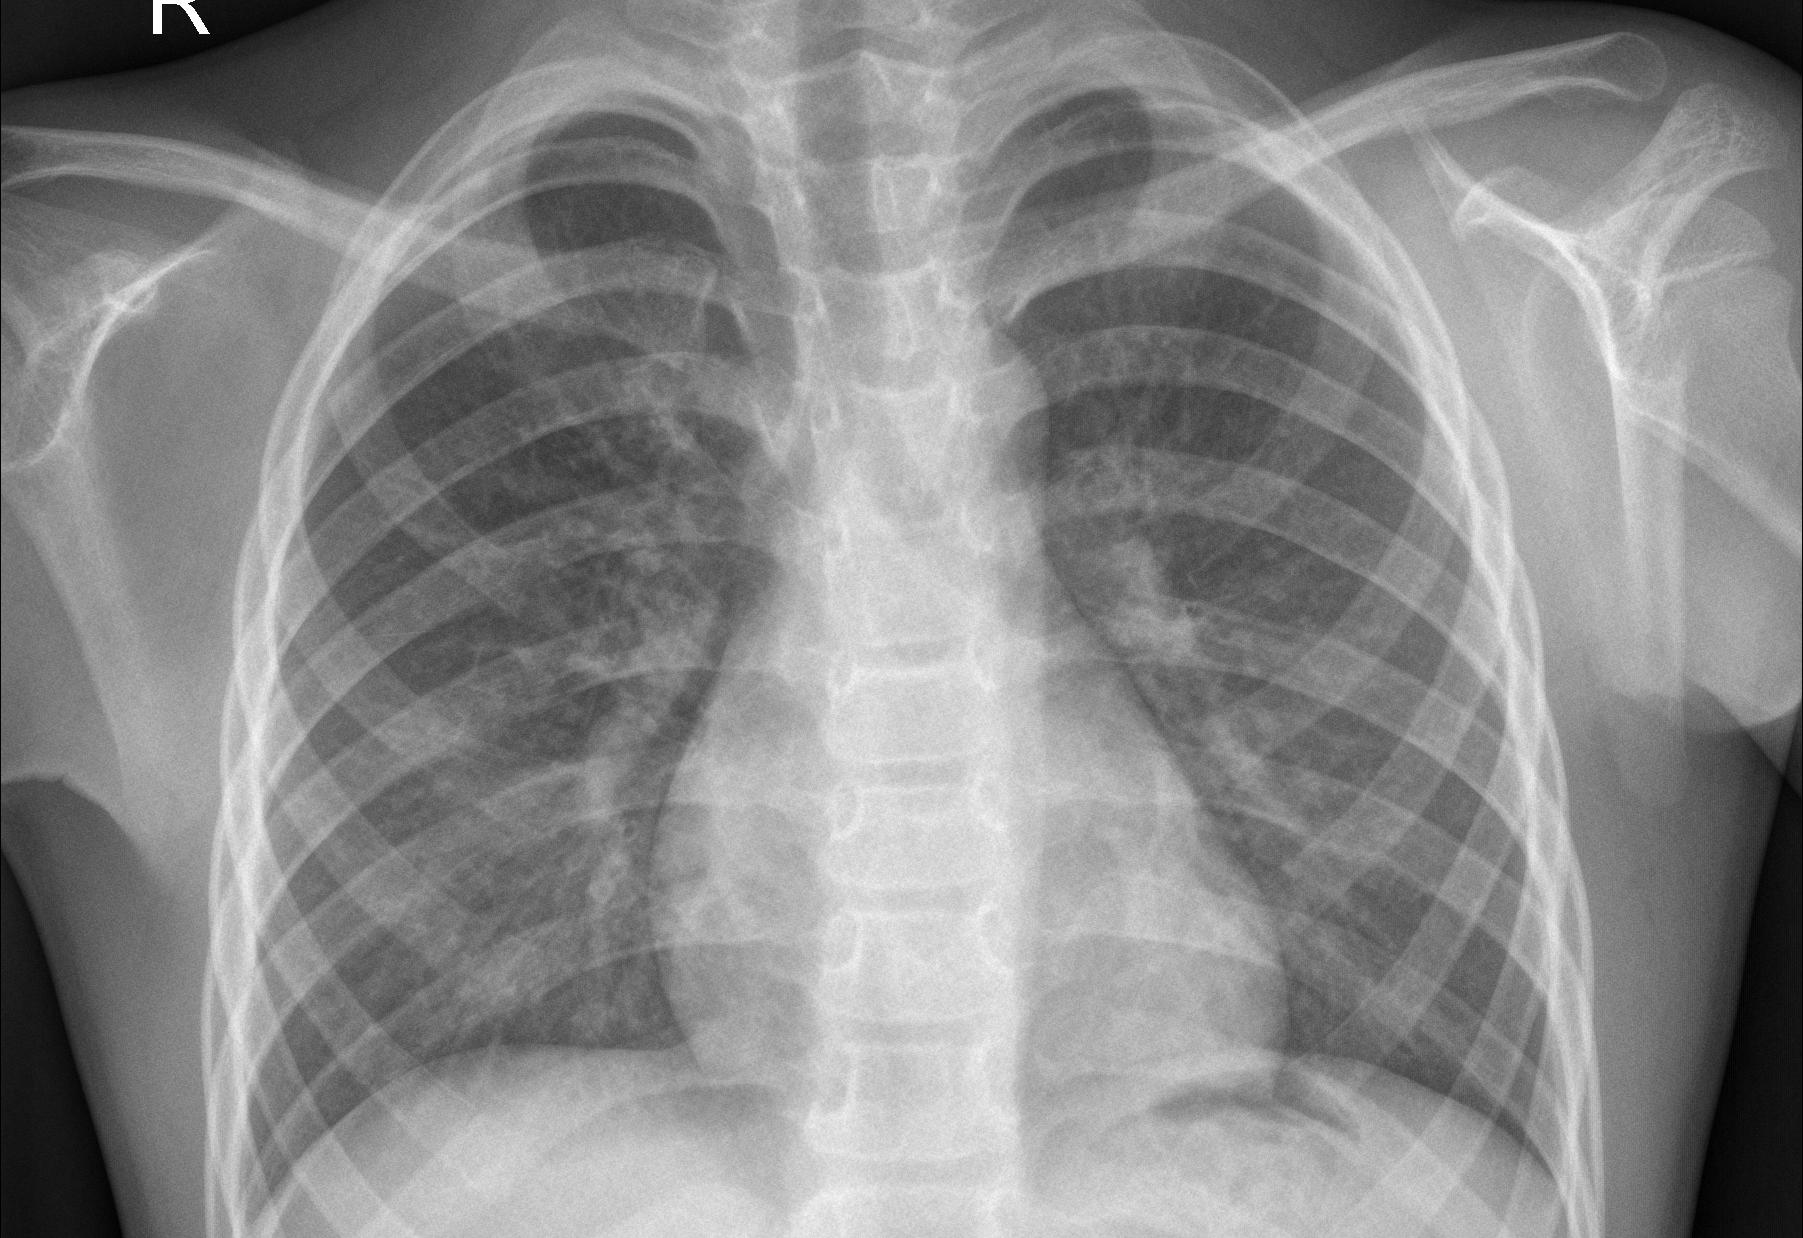

In [31]:
img = PILImage.create(upload.data[-1])
pred, pred_id, probs = learn.predict(img)
print(f"Bashorat: {pred} ")
print(f"Ehtomolligi: {probs[pred_id]*100:.1f}%")
img

In [32]:
learn.export("Class_Covid_19_model.pkl")